In [6]:
import cv2
from numpy import ndarray
from typing import List
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from aipose.models.yolov7.domain import YoloV7Pose, YoloV7PoseKeypoints
%matplotlib inline

In [7]:
image: ndarray = cv2.imread("./../person.jpg")
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
model = YoloV7Pose()

Using cache found in /home/user/.cache/torch/hub/WongKinYiu_yolov7_main

                 from  n    params  module                                  arguments                     
  0                -1  1         0  models.common.ReOrg                     []                            
  1                -1  1      7040  models.common.Conv                      [12, 64, 3, 1]                
  2                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  3                -1  1      8320  models.common.Conv                      [128, 64, 1, 1]               
  4                -2  1      8320  models.common.Conv                      [128, 64, 1, 1]               
  5                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
  6                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
  7                -1  1     36992  models.common.Conv                 

In [8]:
yolo_v7_keypoints_list :List[YoloV7PoseKeypoints] = model(image)

/aipose/.venv/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


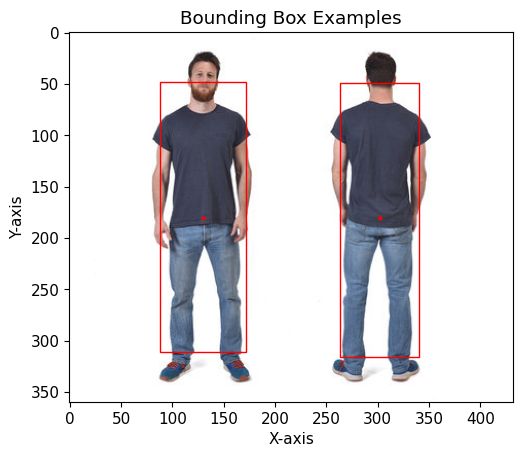

In [9]:
%matplotlib inline
fig, ax = plt.subplots()

ax.imshow(image)

for prediction in yolo_v7_keypoints_list:
    bounding_box = prediction.prediction_bounding_box_xyxy
    x, y = prediction.human_center
    xmin, xmax, ymin, ymax = bounding_box.xmin, bounding_box.xmax, bounding_box.ymin, bounding_box.ymax
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.plot(x, y,  marker='o', markersize=2, color='r')

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Bounding Box Examples")

plt.show()

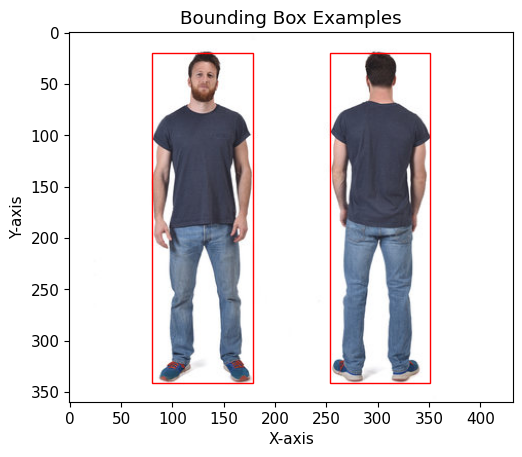

In [10]:
def draw_bounding_box_xywh(ax, bounding_box, color='r'):
    x = bounding_box.x
    y = bounding_box.y
    width = bounding_box.width
    height = bounding_box.height

    rect = patches.Rectangle((x - width / 2, y - height / 2), width, height, linewidth=1, edgecolor=color, facecolor='none')
    ax.add_patch(rect)

predictions = yolo_v7_keypoints_list

fig, ax = plt.subplots()

ax.imshow(image)

for prediction in predictions:
    bounding_box = prediction.prediction_bounding_box_xywh
    draw_bounding_box_xywh(ax, bounding_box, color='r')

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Bounding Box Examples")

plt.show()
